# Foundations

In [1]:
import numpy as np
from numpy import ndarray

import matplotlib.pyplot as plt
%matplotlib inline

from typing import Callable, List

## 1. Functions

In [2]:
def square(x: ndarray) -> ndarray:
    """
    Square each element in the input array.
    """
    return np.power(x, 2)

In [3]:
def leaky_relu(x: ndarray) -> ndarray:
    """
    Apply "Leaky ReLU" function to each element in the ndarray.
    """
    return np.maximum(0.2 * x, x)

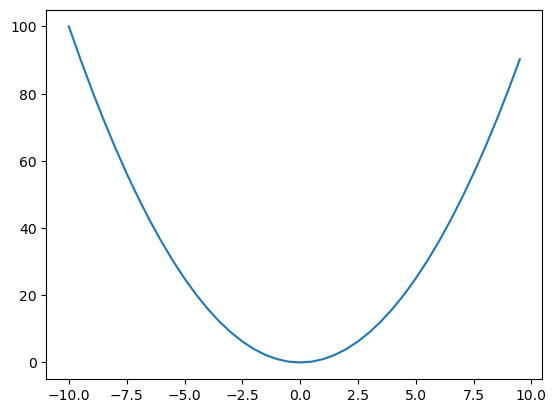

In [4]:
xs = np.arange(-10, 10, 0.5)
ys = square(xs)
plt.plot(xs, ys)

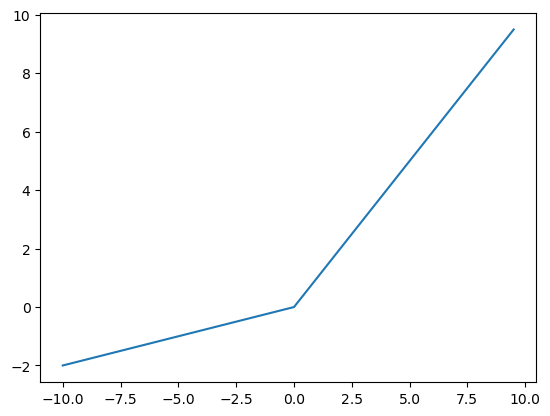

In [5]:
xs = np.arange(-10, 10, 0.5)
ys = leaky_relu(xs)
plt.plot(xs, ys)

## 2. Derivatives

In [6]:
def deriv(func: Callable[[ndarray], ndarray],
          input_: ndarray,
          delta: float = 0.001) -> ndarray:
    """
    Evaluates the derivative of a function "func" at every element in the "input_" array.
    """
    return (func(input_ + delta) - func(input_ - delta)) / (2 * delta)

In [7]:
deriv(square, np.arange(-10, 10))

array([-20., -18., -16., -14., -12., -10.,  -8.,  -6.,  -4.,  -2.,   0.,
         2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.])

In [8]:
deriv(leaky_relu, np.arange(-10, 10))

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.6, 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. ])

## 3. Nested functions

In [9]:
Array_Function = Callable[[ndarray], ndarray] # Simple function that takes in ndarray and outputs ndarray
Chain = List[Array_Function] # List of array functions

In [10]:
def chain_length_2(chain: Chain, a: ndarray) -> ndarray:
    """
    Evalues two functions in a row, in a "Chain".
    """
    assert len(chain) == 2, \
    "Length of input 'chain' should be 2"

    f1 = chain[0]
    f2 = chain[1]

    return f2(f1(a))

In [11]:
chain_length_2([leaky_relu, square], np.arange(-10, 10))

array([4.00e+00, 3.24e+00, 2.56e+00, 1.96e+00, 1.44e+00, 1.00e+00,
       6.40e-01, 3.60e-01, 1.60e-01, 4.00e-02, 0.00e+00, 1.00e+00,
       4.00e+00, 9.00e+00, 1.60e+01, 2.50e+01, 3.60e+01, 4.90e+01,
       6.40e+01, 8.10e+01])

## 4. The Chain Rule

In [12]:
def chain_deriv_2(chain: Chain,
                  input_range: ndarray) -> ndarray:
    """
    Uses the chain rule to compute the derivatives of two nested functions:
    f2(f1(x))' = f2'(f1(x)) * f1'(x")
    """
    assert len(chain) == 2, \
    "This function requires 'Chain' objects of length 2"

    assert input_range.ndim == 1, \
    "FUnction requires a 1 dimensional ndarray as input_range"

    f1 = chain[0]
    f2 = chain[1]

    df1dx = deriv(f1, input_range)
    df2du = deriv(f2, f2(input_range))
    return df1dx * df2du

## Computational Graph with Two 2D Matrix Inputs

In [13]:
def matrix_function_forward_sum(X: ndarray,
                                W: ndarray,
                                sigma: Array_Function) -> float:
    """
    Computing the result of the forward pass of this function with input ndarrays X and W and function Sigma.
    """
    assert X.shape[1] == W.shape[0]

    N = np.dot(X, W)
    S = sigma(N)
    L = np.sum(S)
    return L

In [14]:
def sigmoid(z: ndarray) -> ndarray:
    return 1 / (1 + np.exp(-z))

In [16]:
def matrix_function_backward_sum_1(X: ndarray,
                                   W: ndarray,
                                   sigma: Array_Function) -> ndarray:
    """
    Compute the derivate of matrix function with a sum with respect to the first matrix input.
    """
    assert X.shape[1] == W.shape[0]

    N = np.dot(X, W)
    S = sigma(N)
    L = np.sum(S)

    dLdS = np.ones_like(S)

    dSdN = deriv(sigma, N)

    dLdN = dLdS * dSdN

    dNdX = W.T

    dLdX = np.dot(dLdN, dNdX)

    return dLdX

### Verification

In [17]:
np.random.seed(190204)
X = np.random.randn(3, 3)
W = np.random.randn(3, 2)

print("X: ")
print(X)

print("L: ")
print(round(matrix_function_forward_sum(X, W, sigmoid), 4))
print()
print("dLdX: ")
print(matrix_function_backward_sum_1(X, W, sigmoid))

X: 
[[-1.57752816 -0.6664228   0.63910406]
 [-0.56152218  0.73729959 -1.42307821]
 [-1.44348429 -0.39128029  0.1539322 ]]
L: 
2.3755

dLdX: 
[[ 0.2488887  -0.37478057  0.01121962]
 [ 0.12604152 -0.27807404 -0.13945837]
 [ 0.22992798 -0.36623443 -0.02252592]]


In [20]:
X1 = X.copy()
X1[0, 0] += 0.001

print(
    round(
        (matrix_function_forward_sum(X1, W, sigmoid) - matrix_function_forward_sum(X, W, sigmoid)) / 0.001
    , 4) 
)

0.2489
